In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA #time series analysis
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs

In [2]:
df = yf.download('AAPL', start='2015-01-01', end='2021-12-31', adjusted=True, progress=False)
aapl = df.resample('W').last().rename(columns={'Adj Close' : 'adj_close'}).adj_close

In [3]:
aapl_diff = aapl.diff().dropna()


<AxesSubplot:title={'center':'first diff'}, xlabel='Date'>

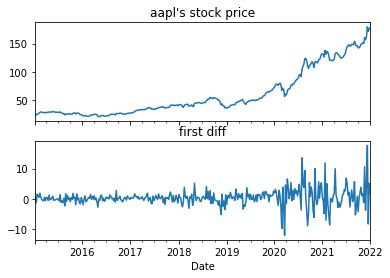

In [4]:
from matplotlib import pyplot as plt 
fig,ax = plt.subplots(2, sharex=True)

aapl.plot(title="aapl's stock price", ax=ax[0])
aapl_diff.plot(ax=ax[1], title='first diff')


In [5]:
print(aapl)

Date
2015-01-04     24.746000
2015-01-11     25.352592
2015-01-18     23.990013
2015-01-25     25.572145
2015-02-01     26.518263
                 ...    
2021-12-05    161.839996
2021-12-12    179.449997
2021-12-19    171.139999
2021-12-26    176.279999
2022-01-02    178.199997
Freq: W-SUN, Name: adj_close, Length: 366, dtype: float64


In [13]:
arima = sm.tsa.arima.ARIMA(aapl, order=(2, 1, 1)).fit()

C:\Users\eric-\anaconda3\envs\fi-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\eric-\anaconda3\envs\fi-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [14]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              adj_close   No. Observations:                  366
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -893.082
Date:                Thu, 06 Jan 2022   AIC                           1794.164
Time:                        22:49:11   BIC                           1809.764
Sample:                    01-04-2015   HQIC                          1800.363
                         - 01-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4800      0.192      2.495      0.013       0.103       0.857
ar.L2          0.1182      0.045      2.641      0.008       0.030       0.206
ma.L1         -0.4990      0.190     -2.628      0.009      -0.871      -0.127
sigma2         7.8117      0.277     28.184      0.000       7.269       8.355
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):              1087.53
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):              26.41   Skew:                             0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""